In [35]:
import pandas as pd
import numpy as np
import qgrid

In [36]:
df = pd.read_csv('../data/Barcelona_datasets/accidents_2017.csv')
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)

In [37]:
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [38]:
df.drop(['District Name',
'Neighborhood Name',
'Part of the day'],axis=1 ,inplace=True)

In [39]:
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)
df['year'] = np.repeat(2017,df.shape[0])
month_to_int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df['month'].replace(month_to_int,inplace=True)

In [40]:
df.isnull().sum().any()
df.replace('Unknown', np.nan, inplace=True)

In [41]:
list(df.columns)

['id',
 'street',
 'weekday',
 'month',
 'day',
 'hour',
 'mild_injuries',
 'serious_injuries',
 'victims',
 'vehicles_involved',
 'longitude',
 'latitude',
 'year']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 13 columns):
id                   10339 non-null object
street               10339 non-null object
weekday              10339 non-null object
month                10339 non-null int64
day                  10339 non-null int64
hour                 10339 non-null int64
mild_injuries        10339 non-null int64
serious_injuries     10339 non-null int64
victims              10339 non-null int64
vehicles_involved    10339 non-null int64
longitude            10339 non-null float64
latitude             10339 non-null float64
year                 10339 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [44]:
df['date']=pd.to_datetime(df[['year', 'month', 'day','hour']])
df.drop(['hour','day','month','year','weekday'], axis=1, inplace=True)

In [50]:
df.id = df.id.apply(lambda x: x.strip())
df.set_index('id', inplace=True)

In [54]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [55]:
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [57]:
import calendar
accidents_month = df.groupby(df['date'].dt.month).count().date
accidents_month.index = [calendar.month_name[x] for x in range(1, 13)]
accidents_month

January      844
February     824
March        935
April        842
May          962
June         908
July         918
August       651
September    769
October      927
November     991
December     762
Name: date, dtype: int64

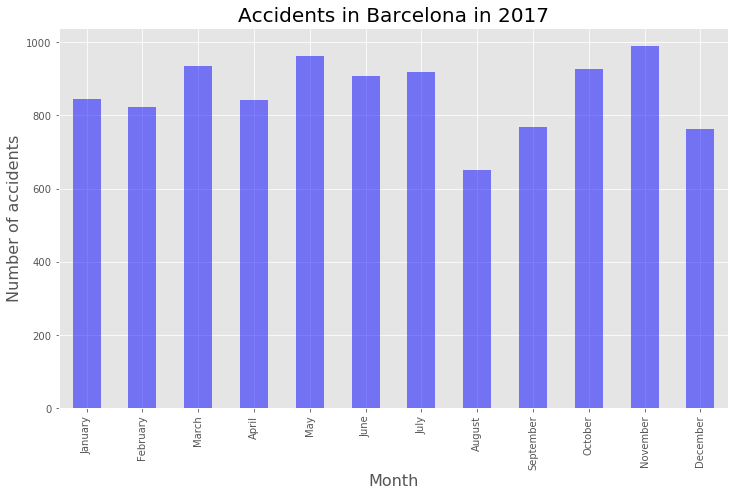

In [67]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot accidents per month
accidents_month.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Month',fontsize=16)
_= plt.ylabel('Number of accidents',fontsize=16);

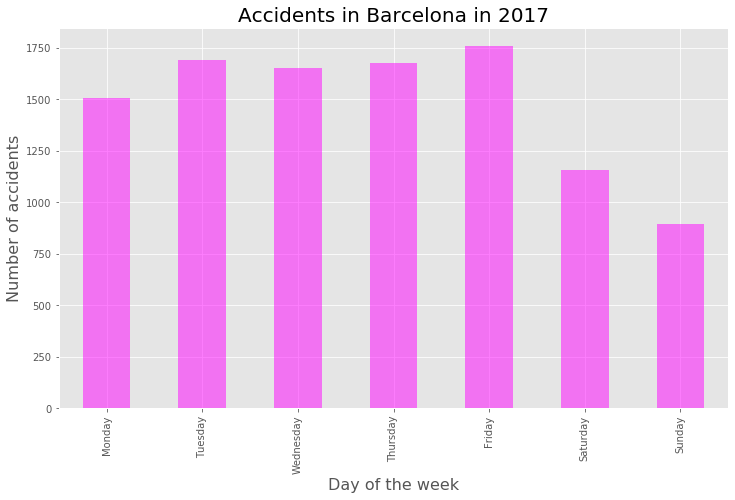

In [66]:
accidents_day = df.groupby(df['date'].dt.dayofweek).count().date

# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
accidents_day.plot(kind='bar',figsize=(12,7), color='magenta', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
_= plt.ylabel('Number of accidents',fontsize=16)

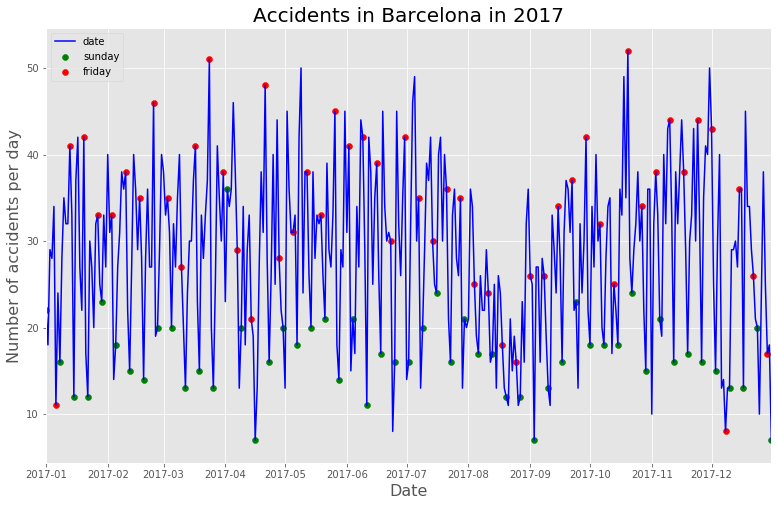

In [65]:
accidents = df.groupby(df['date'].dt.date).count().date

accidents.plot(figsize=(13,8), color='blue')

# sunday accidents
sundays = df.groupby(df[df['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays, color='green', label='sunday')

# friday accidents
friday = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(friday.index, friday, color='red', label='friday')

# Title, x label and y label
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);
_= plt.legend()

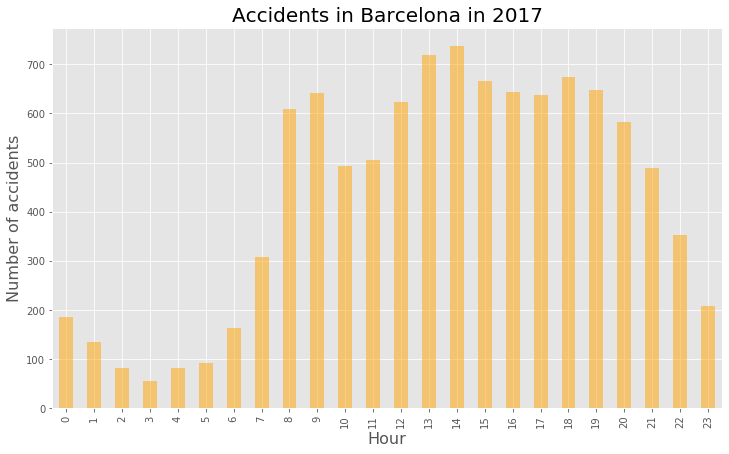

In [68]:
# Number of accident per hour
accidents_hour = df.groupby(df['date'].dt.hour).count().date

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

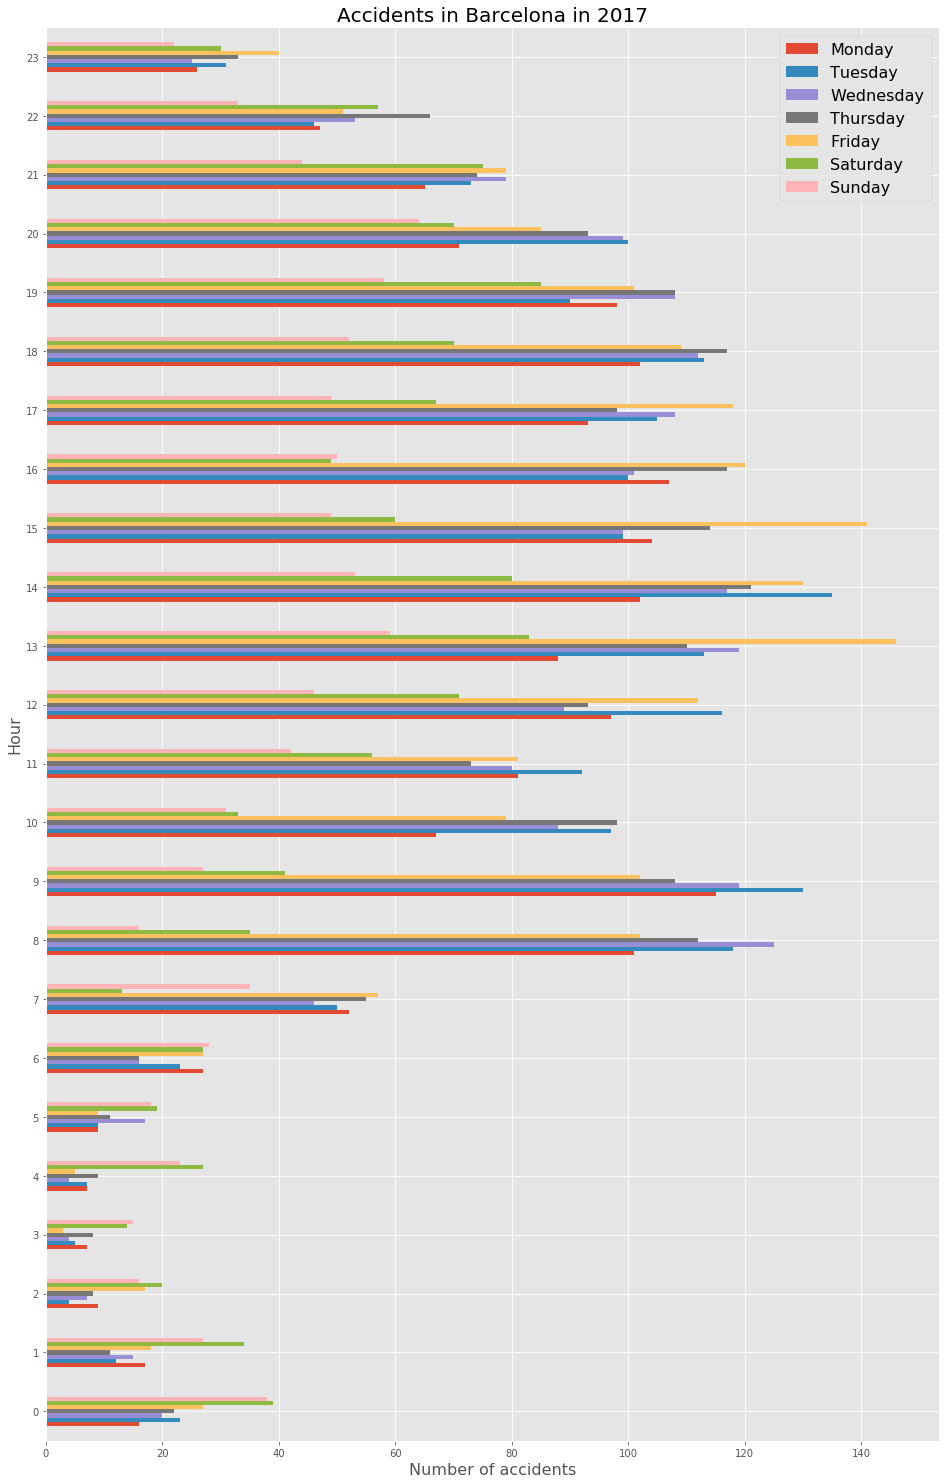

In [69]:
# Number of accident per hour and day
accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

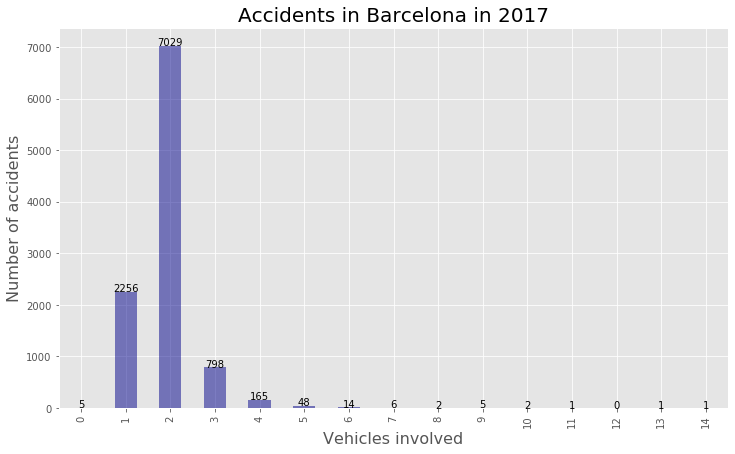

In [70]:
# Compute the number of accidents according to the number of vehicles involved
vehicles_involved = df.vehicles_involved.value_counts()
# There is no car accident with 12 vehicles involved. We include 0 in our Serie for better visualization
vehicles_involved[12]=0

vehicles_involved.sort_index(inplace=True)

# Plot number of car accidents according to the number of vehicles involved
vehicles_involved.plot(kind='bar',figsize=(12,7), color='darkblue', alpha=0.5)

# Title and x,y labels
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Vehicles involved',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

# Print a label above each bar indicating the number of accidents
for index in vehicles_involved.index:
    plt.text(x=index,y=vehicles_involved.loc[index],s=str(vehicles_involved.loc[index]),horizontalalignment='center')

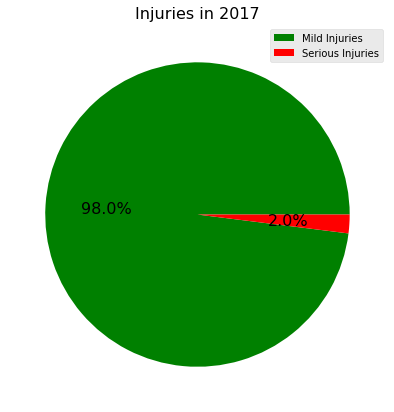

In [72]:
# Serie with number of mild injuries and serious injuries
injuries = df[['mild_injuries','serious_injuries']].sum()

# Pie plot with the percentage of victims with mild and serious injuries
injuries.plot(kind='pie',figsize=(7,7), colors=['green','red'], labels=None, autopct='%1.1f%%', fontsize=16)

# Legend and title
plt.legend(labels=['Mild Injuries', 'Serious Injuries'])
plt.title('Injuries in 2017', fontsize=16)
_= plt.ylabel('')

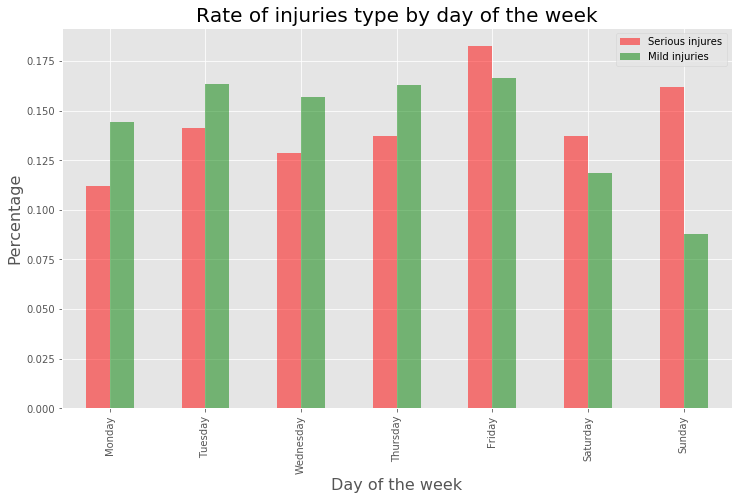

In [73]:
# Number of serious injuries per day of the week
accidents_serious = df[df['serious_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().serious_injuries
# Percentage of serious injuries per day of the week
rate_serious = accidents_serious/accidents_serious.sum()

# Number of mild injuries per day of the week
accidents_mild = df[df['mild_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().mild_injuries
# Percentage of mild injuries per day of the week
rate_mild = accidents_mild/accidents_mild.sum()

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Serious injures':rate_serious,'Mild injuries':rate_mild})
rates.plot(kind='bar',figsize=(12,7),color=['red','green'],alpha=0.5)

# Title and labels
plt.title('Rate of injuries type by day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)]);

In [75]:
import folium
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)
barcelona_map

In [79]:
# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(barcelona_map)
    
# Show map
barcelona_map

In [80]:
from folium import plugins

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Instantiate a mark cluster object for the car accidents
accidents = plugins.MarkerCluster().add_to(barcelona_map)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
barcelona_map

In [81]:
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Nested list that contains the latitud and the longitud of the different accidents. 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(df.latitude,df.longitude,df.date.dt.hour):
    hour_list[hour].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(barcelona_map)

barcelona_map